Part I
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts
n = 60
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left

Task 1


In [69]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)

[-1.8789391  -0.42825257  2.94450171 -4.33893838 -0.88126675  0.69627682
 -1.43322921  2.77850692 -0.24406061  1.12807499 -0.74424197  0.66742171
 -1.16537404 -4.04285329  0.69421515 -0.0133077  -1.81607801 -1.31012711
 -2.13542368  4.94917564  1.90884635  1.73586457  0.23707328 -4.87647202
  1.35928174  6.20815874  3.45227245  0.15358925 -3.03764867 -4.87465859
 -2.37664922  2.6777186  -0.81582586 -1.09223792 -1.65581778  2.82904811
 -1.59883293  2.3118585   5.72739297 -3.4514219   3.03677221  3.41048753
 -4.07575749  0.94417592  3.01848087 -3.23128334  2.42142825  1.81229563
  1.71540947  2.02373543  2.28807384 -0.035338   -0.55503534 -1.74723316
  4.29260348 -2.15550095  4.65048587  3.87959375  2.50795449 -0.58147302]


In [70]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = math.floor(sample.min())
max_smpl = math.ceil(sample.max())
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 7
Длина интервала: 1.7142857142857142
Максимальный: 7
Минимальный элемент: -5 


In [71]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -5.0 - -3.2857142857142856
2 interval: -3.2857142857142856 - -1.5714285714285716
3 interval: -1.5714285714285716 - 0.14285714285714235
4 interval: 0.14285714285714235 - 1.8571428571428568
5 interval: 1.8571428571428568 - 3.571428571428571
6 interval: 3.571428571428571 - 5.285714285714285
7 interval: 5.285714285714285 - 7.0


In [72]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')



1 interval: 6
2 interval: 10
3 interval: 13
4 interval: 11
5 interval: 14
6 interval: 4
7 interval: 2

Сумма частот - 0.9999999999999999


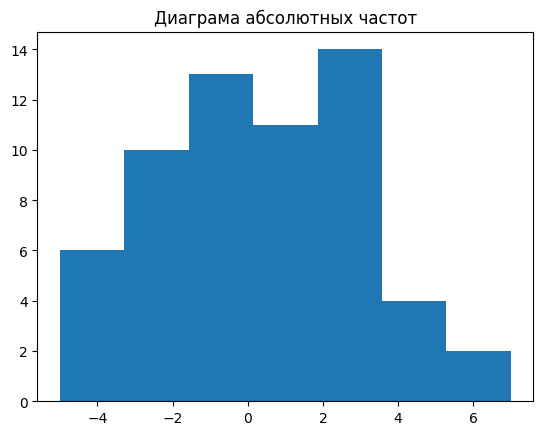

In [73]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [74]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.05833333333333334
2 interval: 0.09722222222222224
3 interval: 0.1263888888888889
4 interval: 0.10694444444444445
5 interval: 0.13611111111111113
6 interval: 0.03888888888888889
7 interval: 0.019444444444444445


[0.05833333 0.09722222 0.12638889 0.10694444 0.13611111 0.03888889
 0.01944444]
0.5833333333333335


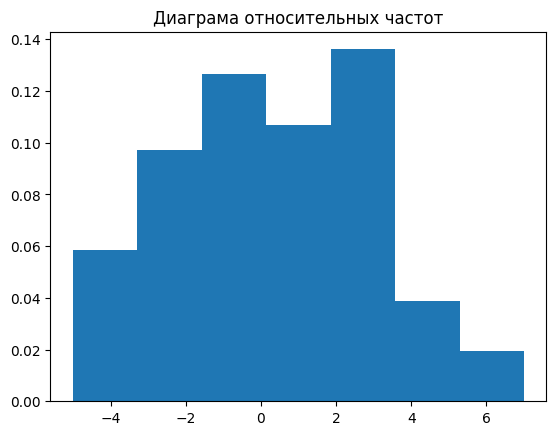

In [75]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

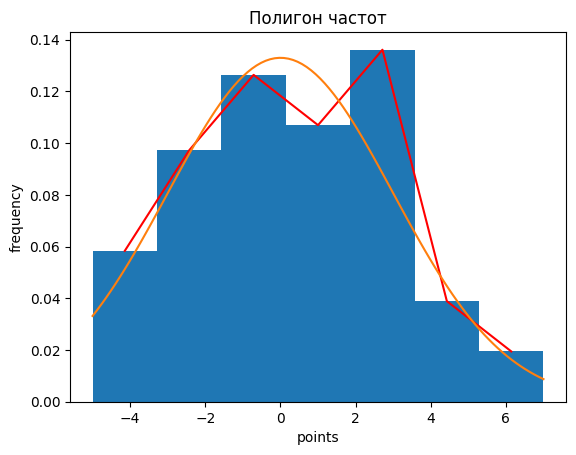

In [76]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.pdf(x, a, sigma))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [77]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)


Сумма площадей под графиком:  1.0000000000000002


Function graph

In [78]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


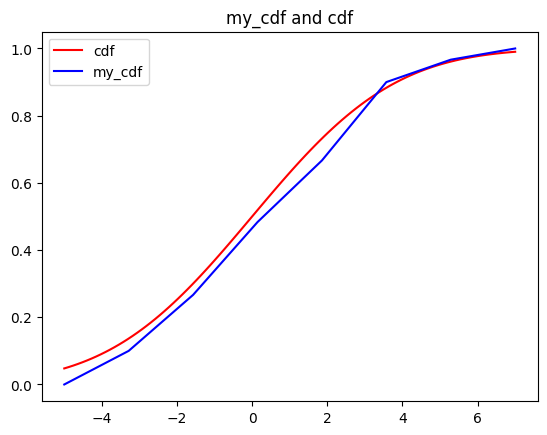

In [79]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------


x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.cdf(x, a, sigma), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-1.613079
0.50,0.195331
0.75,2.443060


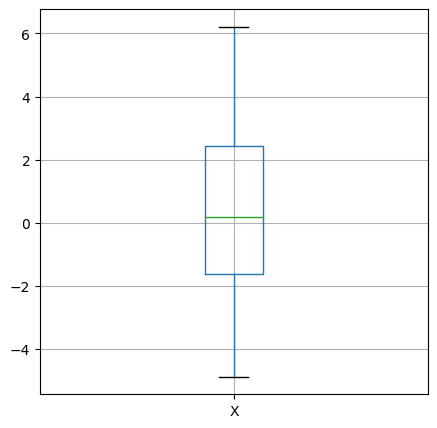

In [80]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [84]:
print(q)
print(f"Вероятность по таблице {0.4599*2}")
print(f"Вероятность по lib {sts.norm().cdf(q)-sts.norm().cdf(-q)}")

prob = 0
for i in sample:
    if i>mode -(q*sigma) and i<mode +(q*sigma):
        prob+=1
prob/=n
print(f"Статистическая {prob}")


1.75
Вероятность по таблице 0.9198
Вероятность по lib 0.9198816862723658
Статистическая 0.95


part 4

In [82]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - 0.3644582603812778, 
variacne - 7.318386273419052, 
dev - 2.7052516100021182, 
Skewness - 0.0069426468528082895, 
Kurtosis - -0.6746011140334964


In [83]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')
print(f'S^2: {(s2)*len(sample)/(len(sample)-1)}')

x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: 0.36445826038127777
Эмпирическая дисперсия: 7.196413168862067
Стандартное отклонение: 2.6826131232181183
S^2: 7.318386273419051
Коэффициент ассимметрии: 0.006942646852808242
Коэффициент эксцесса: -0.6746011140334955
